In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/prata/OneDrive/Desktop/Water.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

number of row=3276 & number of column=10

In [5]:
# TO find missing Values

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# To fill missing values 

In [8]:
# Replacing missing values in pH, Sulfate & Trihalomethanes with mean value.

In [9]:
df["ph"].fillna(df["ph"].mean(),inplace=True)

In [10]:
df["Sulfate"].fillna(df["Sulfate"].mean(),inplace=True)

In [11]:
df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean(),inplace=True)

In [12]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
A={0:'Not Potable',1:'Potable'}
df['categorical data']=df['Potability'].map(A)

 To convert binary numeric data into categorical data. 

# Visualisation 

# Bar plot

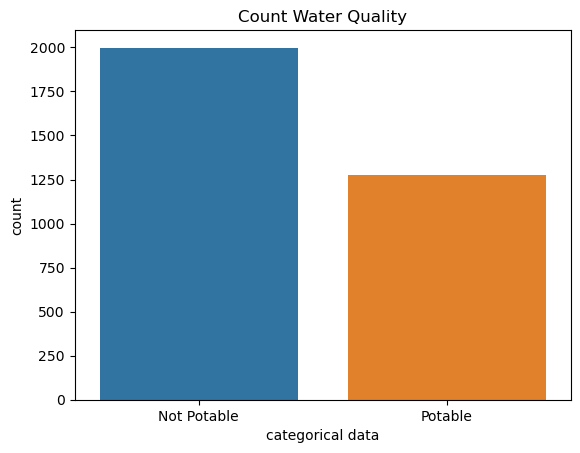

In [14]:
sns.countplot(x='categorical data',data=df)
plt.title('Count Water Quality')
plt.show()

From this count plot we observed that count of Not-Potable water is more than potable water.

# Scatter Plot

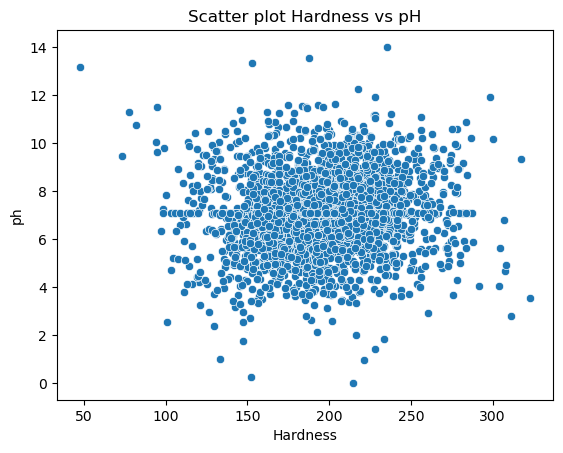

In [15]:
sns.scatterplot(x='Hardness',y='ph',data=df)
plt.title( 'Scatter plot Hardness vs pH')
plt.xlabel('Hardness')
plt.ylabel('ph')
plt.show()

From this Scatter plot we observed that there is no correlation between pH & Hardness.

# Pie charts

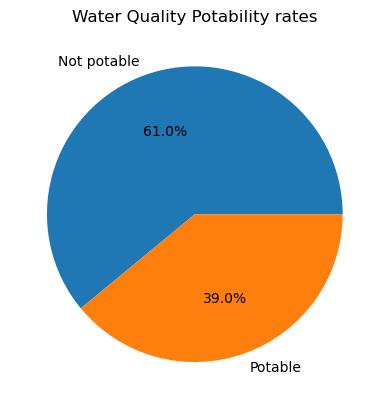

In [16]:
l=['Not potable','Potable']
size=df['Potability'].value_counts()
plt.pie(size,labels=l,autopct='%1.1f%%')
plt.title('Water Quality Potability rates')
plt.show()

From this Pie chart proportion of Not-Potable water is more than Potable water.

# Histograms

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


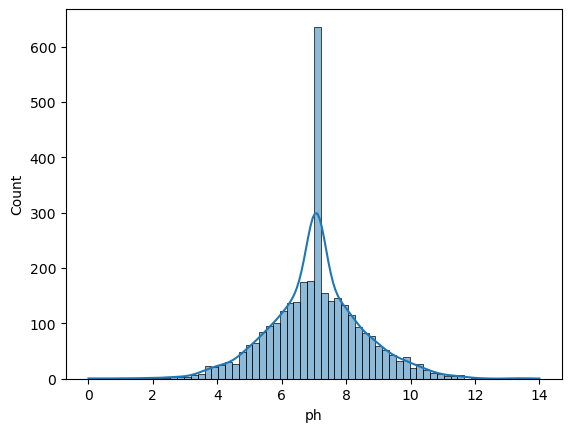

In [17]:
sns.histplot(df['ph'],kde=True)
plt.show()

From this plot we observed that histogram shows bell shaped curves that is symmetric arround central value.
it indicates normal distribution.

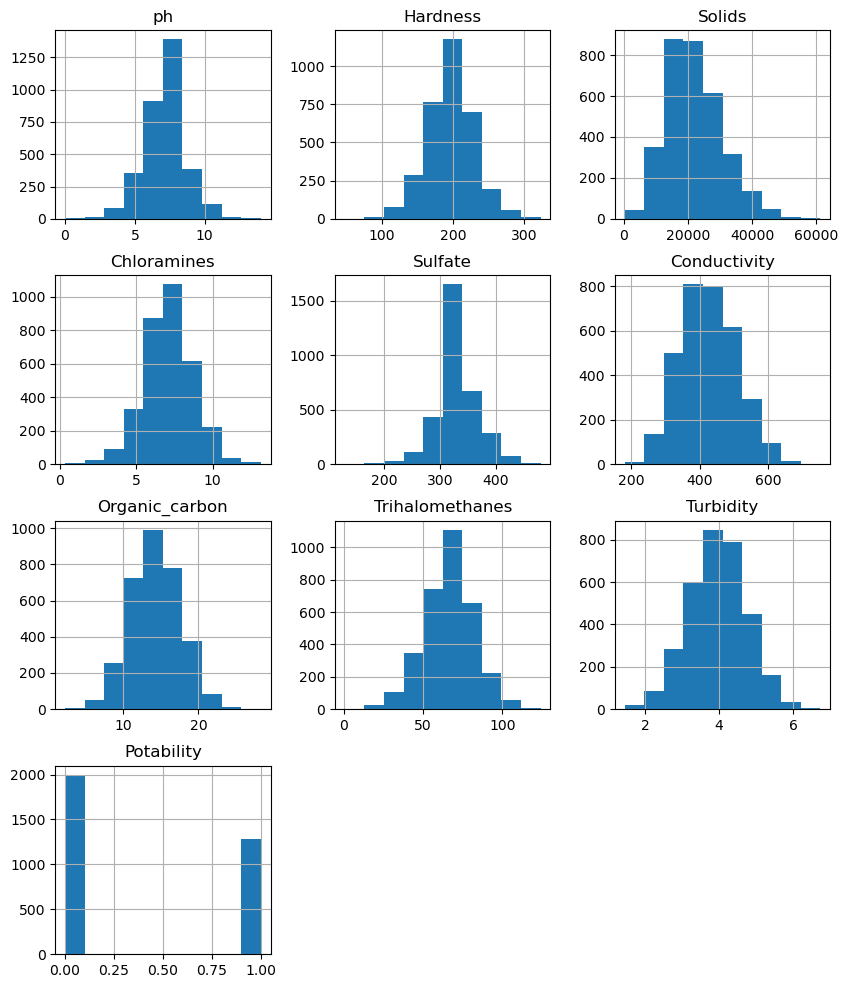

In [18]:
df.hist(figsize=(10,12))
plt.show()

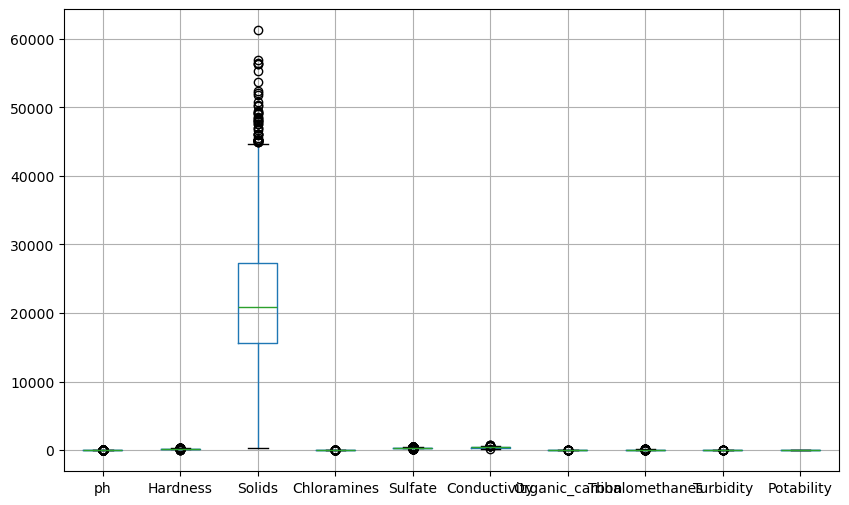

In [19]:
df.boxplot(figsize=(10,6))
plt.show()

In [20]:
q1=df["Solids"].quantile(0.25)
q3=df["Solids"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df.loc[(df["Solids"]<ub) & (df["Solids"]>lb)]
print(lb,ub)

-1832.4174374999948 44831.869862499996


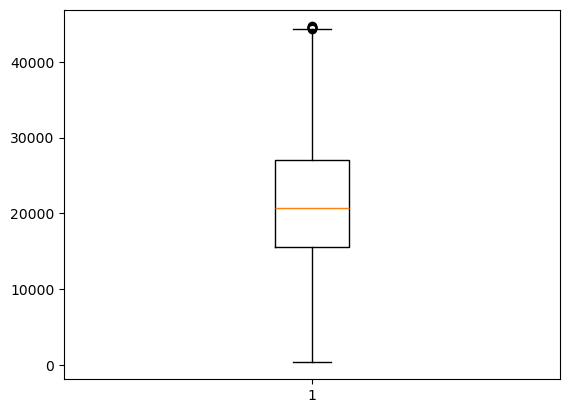

In [21]:
plt.boxplot(df["Solids"])
plt.show()

In [22]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000
mean,7.086477,196.400859,21624.156607,7.127770,334.029217,426.046002,14.286469,66.361000,3.968133,0.388665
std,1.457416,32.699309,8196.468649,1.577788,35.788750,80.844851,3.309442,15.789540,0.779996,0.487522
min,0.227499,47.432000,320.942611,0.352000,180.206746,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.281904,176.969431,15547.186630,6.133935,317.382315,365.491679,12.065317,56.532387,3.440753,0.000000
50%,7.080795,196.982379,20709.279760,7.132154,333.775777,421.664482,14.217373,66.396293,3.955091,0.000000
75%,7.865095,216.647068,27045.929960,8.117114,350.430940,481.480828,16.563116,76.631186,4.501025,1.000000
max,14.000000,323.124000,44652.363870,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Model Building

In [23]:
# Choose Independent & Dependent Variable.

In [24]:
X=df.drop(columns=['Potability','categorical data'],axis=1)
Y=df['Potability']

In [25]:
# Split data into train test 80:20.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X.shape,X_train.shape,X_test.shape)

(3229, 9) (2583, 9) (646, 9)


# Oversampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
osm=RandomOverSampler(random_state=0)
X_rs, Y_rs = osm.fit_resample(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_rs,Y_rs, test_size=0.2, random_state=0)

In [30]:
from sklearn.tree import DecisionTreeClassifier
# To fit mode
model2=DecisionTreeClassifier(random_state=0)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

# Feature Importance 

In [32]:
# Get feature importances
import pandas as pd
fea_imp = model2.feature_importances_
df=pd.DataFrame({'feature':X.columns,'Importance':fea_imp*100})
df=df.sort_values(by='Importance',ascending=False)
df

,feature,Importance
1,Hardness,13.702034
3,Chloramines,12.352586
4,Sulfate,11.980220
0,ph,11.866369
2,Solids,10.922519
5,Conductivity,10.192491
7,Trihalomethanes,10.109629
8,Turbidity,9.860982
6,Organic_carbon,9.013171


In [33]:
X=X.drop(columns=["Conductivity","Trihalomethanes","Turbidity","Organic_carbon"],axis=1)

# Naive Bayes Algorithm

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
# To fit model
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [37]:
# TO predict test data using fitted model 
Y_predict=model.predict(X_test)

#  To find Accuracy,Precision,Recall,Confusion matrix ,Classification report

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [39]:
conf_matrix=confusion_matrix(Y_test,Y_predict)
recall=recall_score(Y_test,Y_predict)
accuracy=accuracy_score(Y_test,Y_predict)
precision=precision_score(Y_test,Y_predict)
class_report=classification_report(Y_test,Y_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[285 129]
 [198 178]]
0.5860759493670886
0.5798045602605864
0.4734042553191489
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       414
           1       0.58      0.47      0.52       376

    accuracy                           0.59       790
   macro avg       0.58      0.58      0.58       790
weighted avg       0.59      0.59      0.58       790



# Grid Search CV for Naive Bayes

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
par_G={'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5]}
gsm=GridSearchCV(estimator=model,param_grid=par_G,cv=5,verbose=2,n_jobs=-1)
gsm.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             verbose=2)

In [42]:
y_predict=gsm.predict(X_test)

In [43]:
accuracy=accuracy_score(Y_test,y_predict)
precision=precision_score(Y_test,y_predict)
recall=recall_score(Y_test,y_predict)
print(accuracy)
print(precision)
print(recall)

0.5860759493670886
0.5798045602605864
0.4734042553191489


# K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# To fit model
k=5
model1=KNeighborsClassifier(n_neighbors=k)

In [46]:
model1.fit(X_train,Y_train)

KNeighborsClassifier()

In [47]:
Y1_predict=model1.predict(X_test)

In [48]:
conf_matrix=confusion_matrix(Y_test,Y1_predict)
recall=recall_score(Y_test,Y1_predict)
accuracy=accuracy_score(Y_test,Y1_predict)
precision=precision_score(Y_test,Y1_predict)
class_report=classification_report(Y_test,Y1_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[228 186]
 [145 231]]
0.5810126582278481
0.5539568345323741
0.6143617021276596
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       414
           1       0.55      0.61      0.58       376

    accuracy                           0.58       790
   macro avg       0.58      0.58      0.58       790
weighted avg       0.58      0.58      0.58       790



# Grid Search CV for K-Nearest Neighbors

In [49]:
pg = {'n_neighbors': [3, 5, 7, 9]}
gsm1=GridSearchCV(estimator=model1,param_grid=pg,cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
gsm1.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy',
             verbose=1)

In [50]:
y1_predict=gsm1.predict(X_test)

In [51]:
accuracy=accuracy_score(Y_test,y1_predict)
precision=precision_score(Y_test,y1_predict)
recall=recall_score(Y_test,y1_predict)
print(accuracy)
print(precision)
print(recall)

0.6113924050632912
0.5819477434679335
0.651595744680851


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# To fit model
model2=DecisionTreeClassifier(random_state=0)

In [54]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [55]:
Y2_predict=model2.predict(X_test)

In [56]:
conf_matrix=confusion_matrix(Y_test,Y2_predict)
recall=recall_score(Y_test,Y_predict)
accuracy=accuracy_score(Y_test,Y2_predict)
precision=precision_score(Y_test,Y2_predict)
class_report=classification_report(Y_test,Y2_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[257 157]
 [ 96 280]]
0.6797468354430379
0.6407322654462243
0.4734042553191489
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       414
           1       0.64      0.74      0.69       376

    accuracy                           0.68       790
   macro avg       0.68      0.68      0.68       790
weighted avg       0.69      0.68      0.68       790



# Grid Search CV for Decision Tree

In [57]:
pg={'criterion': ['gini', 'entropy'],'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
gsm2=GridSearchCV(estimator=model2,param_grid=pg,cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
gsm2.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [58]:
y2_predict=gsm2.predict(X_test)

In [59]:
accuracy=accuracy_score(Y_test,y2_predict)
precision=precision_score(Y_test,y2_predict)
recall=recall_score(Y_test,y2_predict)
print(accuracy)
print(precision)
print(recall)

0.7037974683544304
0.6621004566210046
0.7712765957446809


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
# To fit model 
model3=LogisticRegression(max_iter=1000)

In [62]:
model3.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [63]:
Y3_predict=model3.predict(X_test)

In [64]:
conf_matrix=confusion_matrix(Y_test,Y_predict)
recall=recall_score(Y_test,Y_predict)
accuracy=accuracy_score(Y_test,Y_predict)
precision=precision_score(Y_test,Y_predict)
class_report=classification_report(Y_test,Y_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[285 129]
 [198 178]]
0.5860759493670886
0.5798045602605864
0.4734042553191489
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       414
           1       0.58      0.47      0.52       376

    accuracy                           0.59       790
   macro avg       0.58      0.58      0.58       790
weighted avg       0.59      0.59      0.58       790



# Grid Search CV for Logistic Regression

In [65]:
pg= {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']}
gsm3=GridSearchCV(estimator=model3,param_grid=pg,cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
gsm3.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [66]:
y3_predict=gsm3.predict(X_test)

In [67]:
accuracy=accuracy_score(Y_test,y3_predict)
precision=precision_score(Y_test,y3_predict)
recall=recall_score(Y_test,y3_predict)
print(accuracy)
print(precision)
print(recall)

0.48481012658227846
0.4646924829157175
0.5425531914893617


# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
# To fit model
model4=RandomForestClassifier(n_estimators=15)

In [70]:
model4.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=15)

In [71]:
Y4_predict=model4.predict(X_test)

In [72]:
conf_matrix=confusion_matrix(Y_test,Y_predict)
recall=recall_score(Y_test,Y_predict)
accuracy=accuracy_score(Y_test,Y_predict)
precision=precision_score(Y_test,Y_predict)
class_report=classification_report(Y_test,Y_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[285 129]
 [198 178]]
0.5860759493670886
0.5798045602605864
0.4734042553191489
              precision    recall  f1-score   support

           0       0.59      0.69      0.64       414
           1       0.58      0.47      0.52       376

    accuracy                           0.59       790
   macro avg       0.58      0.58      0.58       790
weighted avg       0.59      0.59      0.58       790



# Grid Search CV for Random Forest

In [73]:
pg = {'n_estimators': [100, 200, 300],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
gsm4=GridSearchCV(estimator=model4,param_grid=pg,cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
gsm4.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=15), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [74]:
y4_predict=gsm4.predict(X_test)

In [75]:
accuracy=accuracy_score(Y_test,y4_predict)
precision=precision_score(Y_test,y4_predict)
recall=recall_score(Y_test,y4_predict)
print(accuracy)
print(precision)
print(recall)

0.8
0.8027777777777778
0.7686170212765957


# Support Vector Machine(SVM)

In [76]:
from sklearn.svm import SVC

In [77]:
# To fit model 
model5=SVC(kernel='linear',C=1,random_state=0)

In [78]:
model5.fit(X_train,Y_train)

SVC(C=1, kernel='linear', random_state=0)

In [79]:
Y5_predict=model5.predict(X_test)

In [80]:
conf_matrix=confusion_matrix(Y_test,Y5_predict)
recall=recall_score(Y_test,Y5_predict)
accuracy=accuracy_score(Y_test,Y5_predict)
precision=precision_score(Y_test,Y5_predict)
class_report=classification_report(Y_test,Y5_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[156 258]
 [160 216]]
0.4708860759493671
0.45569620253164556
0.574468085106383
              precision    recall  f1-score   support

           0       0.49      0.38      0.43       414
           1       0.46      0.57      0.51       376

    accuracy                           0.47       790
   macro avg       0.47      0.48      0.47       790
weighted avg       0.48      0.47      0.47       790



# Gradient Boosting Machine (GBM)

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gbm=GradientBoostingClassifier(n_estimators=10,learning_rate=0.1,random_state=0)

In [83]:
gbm.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=10, random_state=0)

In [84]:
Y6_predict=gbm.predict(X_test)

In [85]:
conf_matrix=confusion_matrix(Y_test,Y6_predict)
recall=recall_score(Y_test,Y6_predict)
accuracy=accuracy_score(Y_test,Y6_predict)
precision=precision_score(Y_test,Y6_predict)
class_report=classification_report(Y_test,Y6_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[330  84]
 [209 167]]
0.6291139240506329
0.6653386454183267
0.4441489361702128
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       414
           1       0.67      0.44      0.53       376

    accuracy                           0.63       790
   macro avg       0.64      0.62      0.61       790
weighted avg       0.64      0.63      0.62       790



# Grid Search CV for GBM

In [86]:
pg={'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.05, 0.01],'max_depth': [3, 4, 5]}
gsm6=GridSearchCV(estimator=gbm,param_grid=pg,cv=5)
gsm6.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=10,
                                                  random_state=0),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [87]:
y6_predict=gsm6.predict(X_test)

In [88]:
accuracy=accuracy_score(Y_test,y6_predict)
precision=precision_score(Y_test,y6_predict)
recall=recall_score(Y_test,y6_predict)
print(accuracy)
print(precision)
print(recall)

0.739240506329114
0.717948717948718
0.7446808510638298


# Voting Classifier

In [89]:
from sklearn.ensemble import VotingClassifier

In [90]:
f1 = LogisticRegression(max_iter=1000,random_state=0)
f2 = DecisionTreeClassifier(random_state=0)
f3 = SVC(kernel='linear',random_state=0) 

In [91]:
vcm=VotingClassifier(estimators=[('lr',f1),('dt',f2),('svm',f3)],voting='hard')

In [92]:
vcm.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('dt', DecisionTreeClassifier(random_state=0)),
                             ('svm', SVC(kernel='linear', random_state=0))])

In [93]:
Y7_predict=vcm.predict(X_test)

In [94]:
conf_matrix=confusion_matrix(Y_test,Y7_predict)
recall=recall_score(Y_test,Y7_predict)
accuracy=accuracy_score(Y_test,Y7_predict)
precision=precision_score(Y_test,Y7_predict)
class_report=classification_report(Y_test,Y7_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[170 244]
 [151 225]]
0.5
0.47974413646055436
0.598404255319149
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       414
           1       0.48      0.60      0.53       376

    accuracy                           0.50       790
   macro avg       0.50      0.50      0.50       790
weighted avg       0.51      0.50      0.50       790



# Bagging Classifier

In [95]:
from sklearn.ensemble import BaggingClassifier

In [96]:
BE=DecisionTreeClassifier(random_state=0)

In [97]:
bcm=BaggingClassifier(base_estimator=BE,n_estimators=10,random_state=0)

In [98]:
bcm.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                  random_state=0)

In [99]:
Y8_predict=bcm.predict(X_test)

In [100]:
conf_matrix=confusion_matrix(Y_test,Y8_predict)
recall=recall_score(Y_test,Y8_predict)
accuracy=accuracy_score(Y_test,Y8_predict)
precision=precision_score(Y_test,Y8_predict)
class_report=classification_report(Y_test,Y8_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[315  99]
 [104 272]]
0.7430379746835443
0.7331536388140162
0.723404255319149
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       414
           1       0.73      0.72      0.73       376

    accuracy                           0.74       790
   macro avg       0.74      0.74      0.74       790
weighted avg       0.74      0.74      0.74       790



# Grid Search CV for Bagging

In [101]:
pg={
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],}

gsm8=GridSearchCV(estimator=bcm,param_grid=pg,cv=5)
gsm8.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                                         random_state=0),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]})

In [102]:
y8_predict=gsm8.predict(X_test)

In [103]:
accuracy=accuracy_score(Y_test,y8_predict)
precision=precision_score(Y_test,y8_predict)
recall=recall_score(Y_test,y8_predict)
print(accuracy)
print(precision)
print(recall)

0.7848101265822784
0.8047337278106509
0.723404255319149


# Stacking Classifier

In [104]:
from sklearn.ensemble import StackingClassifier

In [105]:
a=RandomForestClassifier(n_estimators=10, random_state=0)
b=GradientBoostingClassifier(n_estimators=10, random_state=0)
c=SVC(kernel='linear',random_state=0)

In [106]:
base_models = [('rf',a),('gb',b),('svc',c)]

In [107]:
# Initialize meta classifier
meta_m=LogisticRegression(random_state=0)

In [108]:
scm=StackingClassifier(estimators=base_models, final_estimator=meta_m)

In [109]:
scm.fit(X_train,Y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=0)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=10,
                                                           random_state=0)),
                               ('svc', SVC(kernel='linear', random_state=0))],
                   final_estimator=LogisticRegression(random_state=0))

In [110]:
Y9_predict=scm.predict(X_test)

In [111]:
conf_matrix=confusion_matrix(Y_test,Y9_predict)
recall=recall_score(Y_test,Y9_predict)
accuracy=accuracy_score(Y_test,Y9_predict)
precision=precision_score(Y_test,Y9_predict)
class_report=classification_report(Y_test,Y9_predict)
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(class_report)

[[329  85]
 [103 273]]
0.7620253164556962
0.7625698324022346
0.726063829787234
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       414
           1       0.76      0.73      0.74       376

    accuracy                           0.76       790
   macro avg       0.76      0.76      0.76       790
weighted avg       0.76      0.76      0.76       790



In [112]:
models={'Naive Bayes':GaussianNB(),'k-Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),'Decision Tree':DecisionTreeClassifier(random_state=0),'Logistic':LogisticRegression(),'Random Forest':RandomForestClassifier(random_state=0),'SVM':SVC(),'voting':VotingClassifier(estimators=[('lr',f1),('dt',f2),('svm',f3)]),'Bagging':BaggingClassifier(),'Stacking':StackingClassifier(estimators=base_models,),'GBM':GradientBoostingClassifier()}

In [113]:
Res=[]
for model_name,model in models.items():
    model.fit(X_train,Y_train)
    predict_Y=model.predict(X_test)
    accuracy=accuracy_score(Y_test,predict_Y)
    precision=precision_score(Y_test,predict_Y)
    recall=recall_score(Y_test,predict_Y)
    Res.append({"Model":model_name,"Accuracy": accuracy,"Precision":precision,"Recall":recall})

In [114]:
import pandas as pd
Result=pd.DataFrame(Res)
print(Result)

                 Model  Accuracy  Precision    Recall
0          Naive Bayes  0.586076   0.579805  0.473404
1  k-Nearest Neighbors  0.581013   0.553957  0.614362
2        Decision Tree  0.679747   0.640732  0.744681
3             Logistic  0.492405   0.471783  0.555851
4        Random Forest  0.796203   0.815249  0.739362
5                  SVM  0.513924   0.482143  0.287234
6               voting  0.500000   0.479744  0.598404
7              Bagging  0.746835   0.729167  0.744681
8             Stacking  0.762025   0.762570  0.726064
9                  GBM  0.677215   0.682779  0.601064


In [116]:
data={'GridModel':['Naive Bayes','k-Nearest Neighbors','Decision Tree','Logistic','Random Forest','SVM','voting','Bagging','Stacking','GBM'],
     'Accuracy':[0.5860759493670886,0.6113924050632912,0.7037974683544304,0.48481012658227846,0.8,0,0,0.7848101265822784,0,0.739240506329114],
     'Precision':[0.5798045602605864,0.5819477434679335,0.6621004566210046,0.4646924829157175,0.8027777777777778,0,0,0.8047337278106509,0,0.717948717948718],
     'Recall':[0.4734042553191489,0.651595744680851,0.7712765957446809,0.5425531914893617,0.7686170212765957,0,0,0.723404255319149,0,0.7446808510638298]}

In [117]:
A=pd.DataFrame(data)
A

,GridModel,Accuracy,Precision,Recall
0,Naive Bayes,0.586076,0.579805,0.473404
1,k-Nearest Neighbors,0.611392,0.581948,0.651596
2,Decision Tree,0.703797,0.662100,0.771277
3,Logistic,0.484810,0.464692,0.542553
4,Random Forest,0.800000,0.802778,0.768617
5,SVM,0.000000,0.000000,0.000000
6,voting,0.000000,0.000000,0.000000
7,Bagging,0.784810,0.804734,0.723404
8,Stacking,0.000000,0.000000,0.000000
9,GBM,0.739241,0.717949,0.744681


In [118]:
pd.concat([Result, A], axis=1)

,Model,Accuracy,Precision,Recall,GridModel,Accuracy,Precision,Recall
0,Naive Bayes,0.586076,0.579805,0.473404,Naive Bayes,0.586076,0.579805,0.473404
1,k-Nearest Neighbors,0.581013,0.553957,0.614362,k-Nearest Neighbors,0.611392,0.581948,0.651596
2,Decision Tree,0.679747,0.640732,0.744681,Decision Tree,0.703797,0.662100,0.771277
3,Logistic,0.492405,0.471783,0.555851,Logistic,0.484810,0.464692,0.542553
4,Random Forest,0.796203,0.815249,0.739362,Random Forest,0.800000,0.802778,0.768617
5,SVM,0.513924,0.482143,0.287234,SVM,0.000000,0.000000,0.000000
6,voting,0.500000,0.479744,0.598404,voting,0.000000,0.000000,0.000000
7,Bagging,0.746835,0.729167,0.744681,Bagging,0.784810,0.804734,0.723404
8,Stacking,0.762025,0.762570,0.726064,Stacking,0.000000,0.000000,0.000000
9,GBM,0.677215,0.682779,0.601064,GBM,0.739241,0.717949,0.744681


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
x=Result['Model']
y=Result['Accuracy']

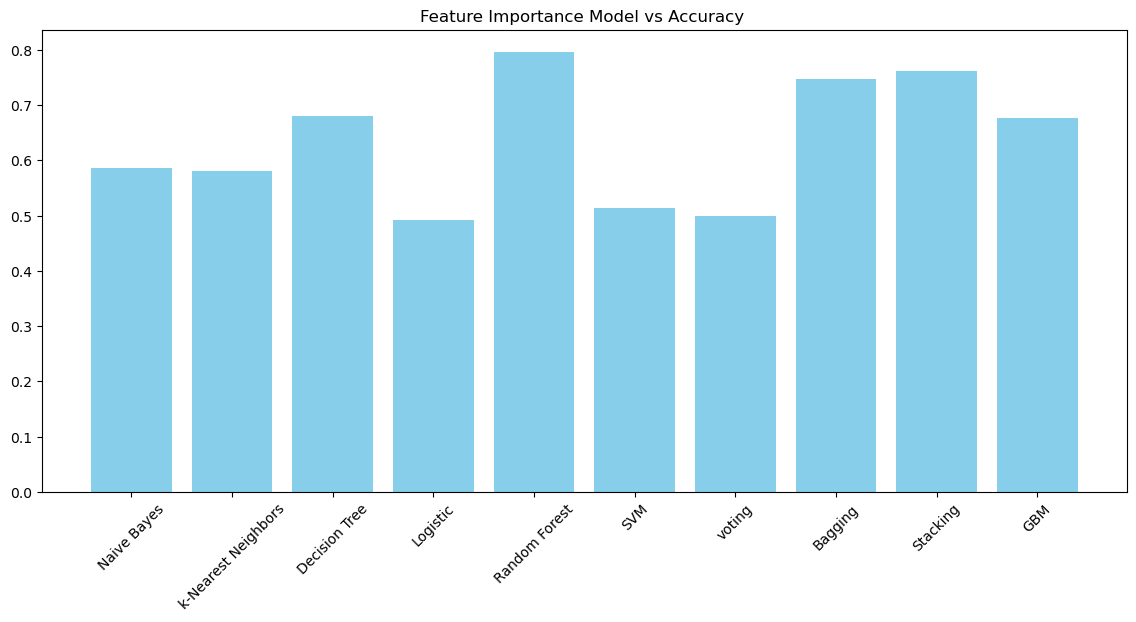

In [121]:
plt.figure(figsize=(14,6))
plt.bar(x,y,color='skyblue')
plt.title('Feature Importance Model vs Accuracy ')
plt.xticks(rotation=45) 
plt.show()


From this plot we observe that according to accuracies Random Forest perform best model.

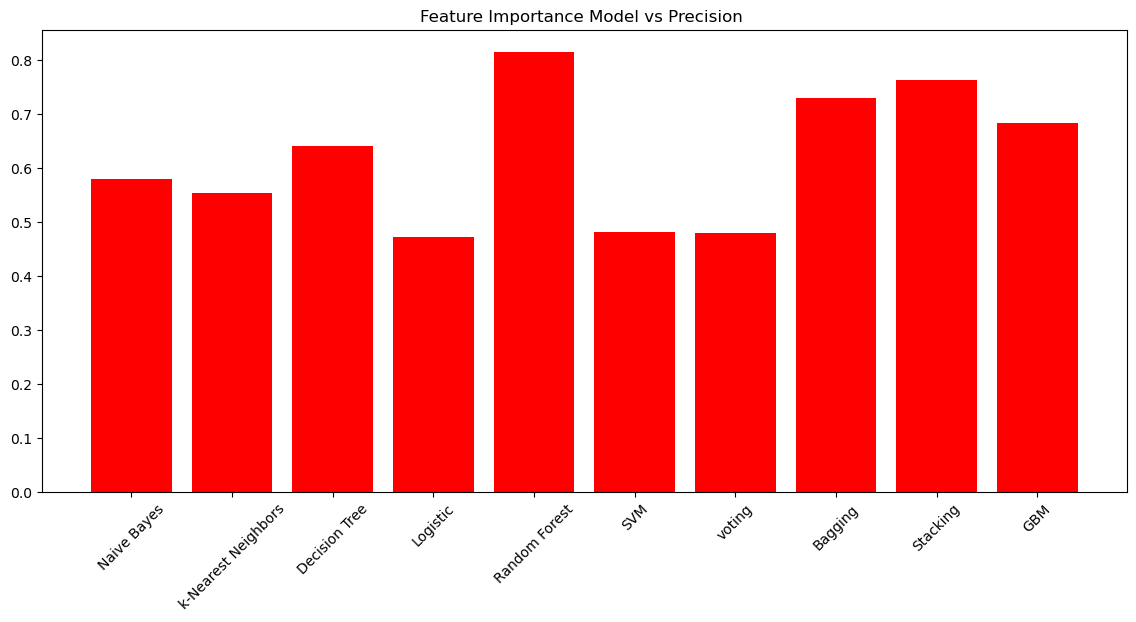

In [122]:
x=Result['Model']
y=Result['Precision']
plt.figure(figsize=(14,6))
plt.bar(x,y,color='red')
plt.title('Feature Importance Model vs Precision ')
plt.xticks(rotation=45) 
plt.show()


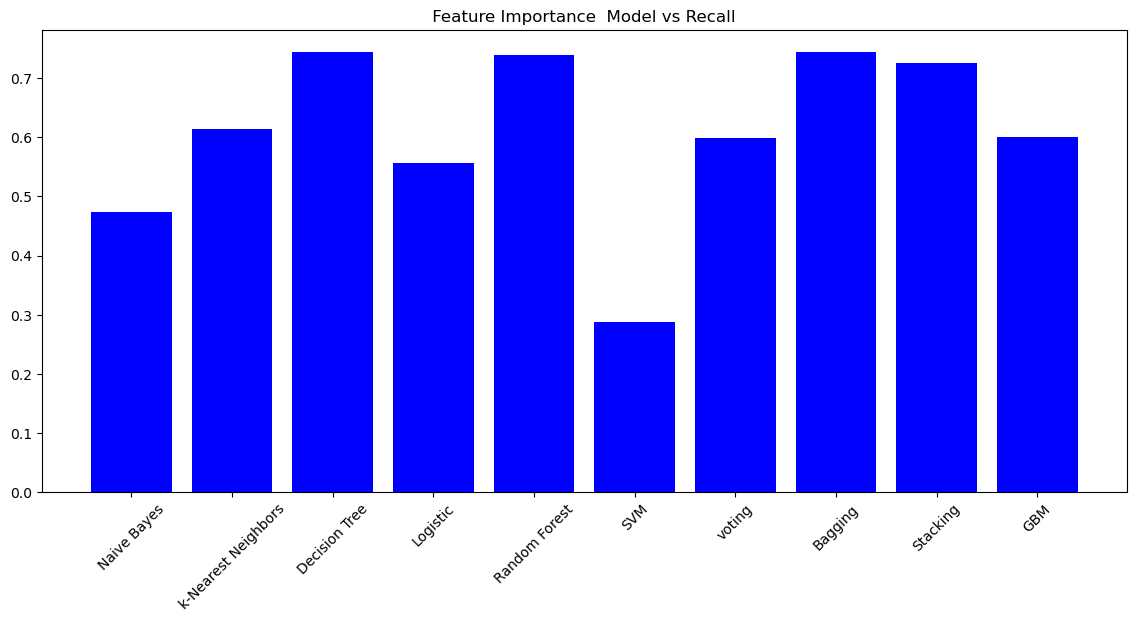

In [132]:
x=Result['Model']
y=Result['Recall']
plt.figure(figsize=(14,6))
plt.bar(x,y,color='blue')
plt.title(' Feature Importance  Model vs Recall ')
plt.xticks(rotation=45) 
plt.show()

In [ ]:
From above three plots we observed that random forest model is best model for estimation

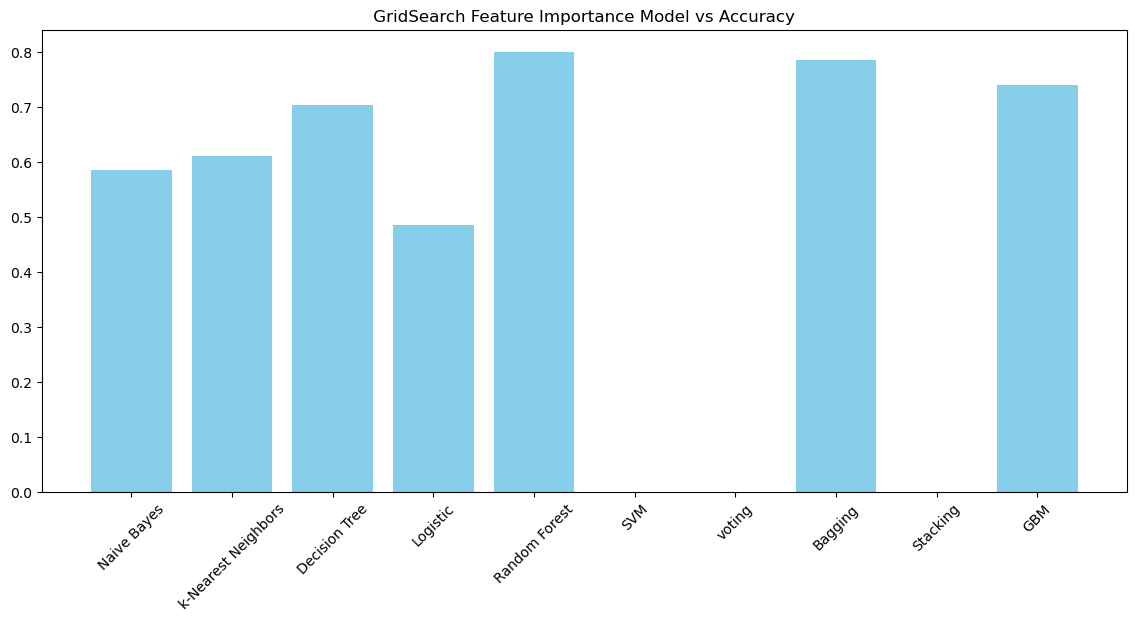

In [124]:
x=A['GridModel']
y=A['Accuracy']
plt.figure(figsize=(14,6))
plt.bar(x,y,color='skyblue')
plt.title(' GridSearch Feature Importance Model vs Accuracy ')
plt.xticks(rotation=45)
plt.show()

From this plot after Grid Serch CV according to accuracies Random Forest perform best model.

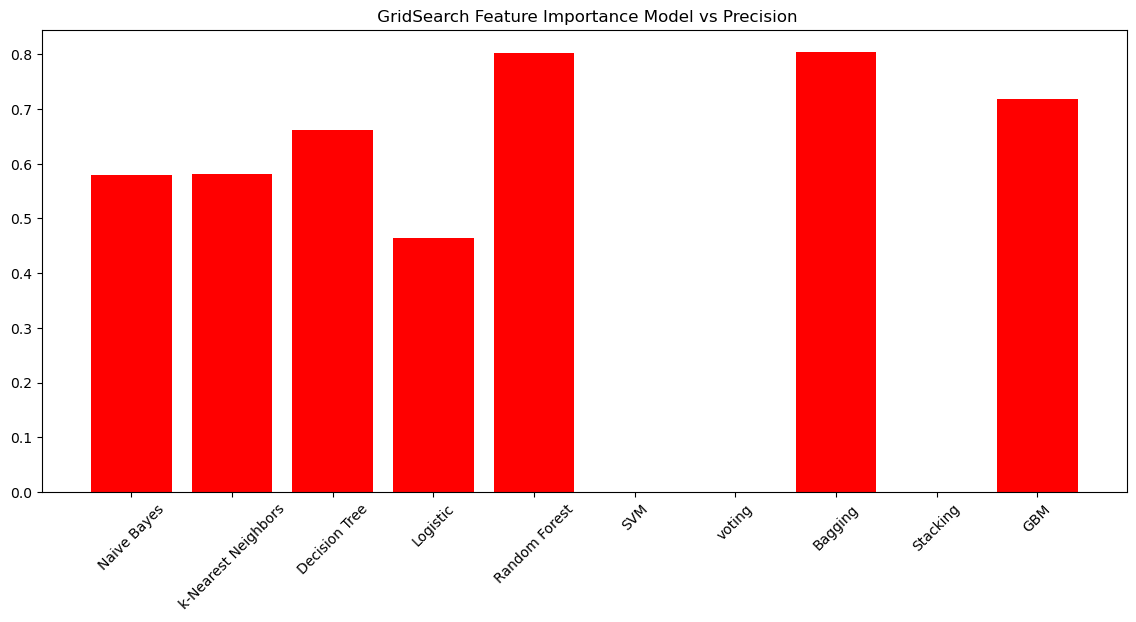

In [125]:
x=A['GridModel']
y=A['Precision']
plt.figure(figsize=(14,6))
plt.bar(x,y,color='red')
plt.title(' GridSearch Feature Importance Model vs Precision')
plt.xticks(rotation=45)
plt.show()

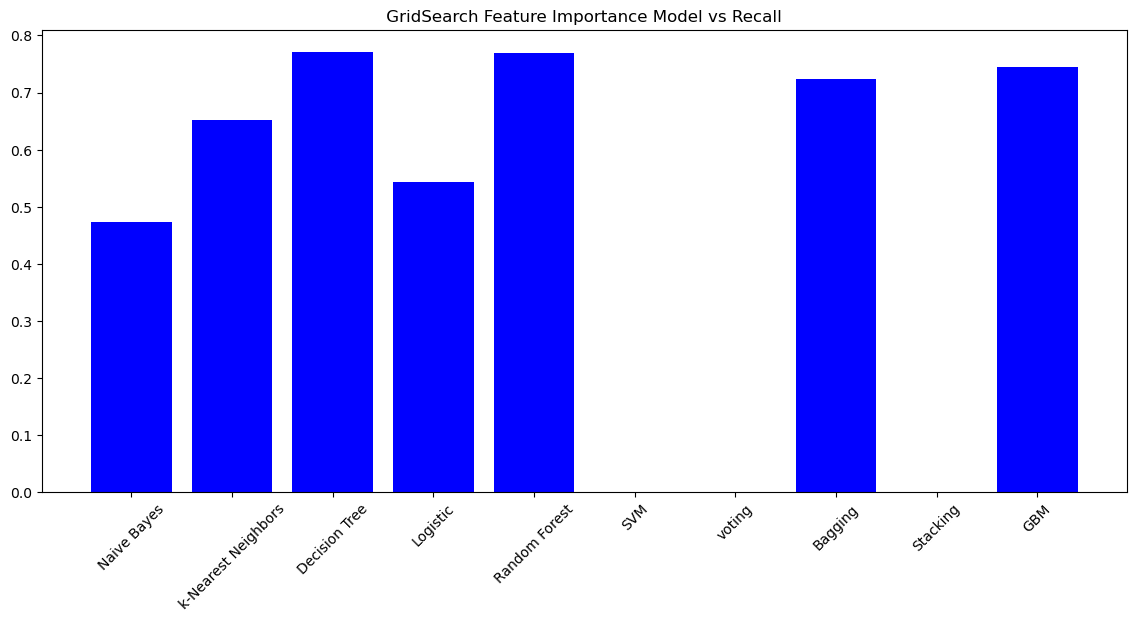

In [126]:
x=A['GridModel']
y=A['Recall']
plt.figure(figsize=(14,6))
plt.bar(x,y,color='blue')
plt.title(' GridSearch Feature Importance Model vs Recall ')
plt.xticks(rotation=45)
plt.show()

# From the water prediction data, before & after Grid Search Cv Random Forest is the best model.